# Explicit conjunction: adding conjunction between sentences

Generating sentences of the form

- 1) **c is P and d is Q, c is not P** (contradiction)

- 2) **c is P and d is Q, d is not Q** (contradiction)

- 3) **c is P and d is Q, e is (not) W** (non-contradiction)

- 4) **c is P and d is Q, c (d) is not Q(P)** (non-contradiction)

In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, positive_personality_list, condition_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

### Generating atoms

In [2]:
template1 = itertools.product(name_list, positive_personality_list)
template1 = list(template1)
template2 = itertools.product(name_list, condition_list)
template2 = list(template2)
upper_bound = 11000/4

### Generating all types of sentences

- 1) **c is P and d is Q, c is not P** (contradiction)

In [3]:
np.random.shuffle(template1)
all_sentences_1 = []
for i in range(int(upper_bound)):
    car, cdr = template1[i]
    caar, cdrr = car, cdr
    while caar == car and cdrr == cdr:
        new_i = np.random.choice(len(template1))
        caar, cdrr = template1[new_i]
    all_sentences_1.append("{} is {} and {} is {}, {} is not {}".format(car,cdr,caar, cdrr,car,cdr))

    
all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)


['Wystan is lively and Winston is silly', ' Wystan is not lively', 1]
['Brown is proud and Sutcliff is obedient', ' Brown is not proud', 1]
['Bond is jolly and Darlene is silly', ' Bond is not jolly', 1]
['Templeton is proud and Sherman is jolly', ' Templeton is not proud', 1]
['Kingsley is nice and Oscar is lively', ' Kingsley is not nice', 1]
['Alden is agreeable and Romilly is proud', ' Alden is not agreeable', 1]
['Lily is nice and Pierce is brave', ' Lily is not nice', 1]
['Gary is zealous and Halsey is polite', ' Gary is not zealous', 1]
['Salmon is calm and Osborn is proud', ' Salmon is not calm', 1]
['Nelly is delightful and Skeet is thankful', ' Nelly is not delightful', 1]


- 2) **c is P and d is Q, d is not Q** (contradiction)

In [4]:
np.random.shuffle(template2)
all_sentences_2 = []
for i in range(int(upper_bound)):
    car, cdr = template2[i]
    caar, cdrr = car, cdr
    while caar == car and cdrr == cdr:
        new_i = np.random.choice(len(template2))
        caar, cdrr = template2[new_i]
    all_sentences_2.append("{} is {} and {} is {}, {} is not {}".format(car,cdr,caar,cdrr,caar,cdrr))

all_sentences_2 = [sentence.split(",") + [1] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)    


['Salmon is better and Nickleby is shy', ' Nickleby is not shy', 1]
['Anne is powerful and Reverie is better', ' Reverie is not better', 1]
['Selby is vast and Colter is shy', ' Colter is not shy', 1]
['Ebony is poor and Briar is dead', ' Briar is not dead', 1]
['Fairbanks is vast and Fitzwilliam is shy', ' Fitzwilliam is not shy', 1]
['Gardner is powerful and Hadden is important', ' Hadden is not important', 1]
['Blythe is important and Byron is uninterested', ' Byron is not uninterested', 1]
['Tyson is unimportant and Shade is shy', ' Shade is not shy', 1]
['Butterfly is famous and Aubrey is gifted', ' Aubrey is not gifted', 1]
['Winslow is gifted and Brinley is gifted', ' Brinley is not gifted', 1]


- 3) **c is P and d is Q, e is (not) W** (non-contradiction)

In [5]:
np.random.shuffle(template1)
np.random.shuffle(template2)
all_sentences_3 = []
for i in range(int(upper_bound)):
    car, cdr = template1[i]
    caar, cdrr = car, cdr
    while caar == car and cdrr == cdr:
        new_i = np.random.choice(len(template1))
        caar, cdrr = template1[new_i]
    third_i = np.random.choice(len(template2))
    caaar, cdrrr = template2[third_i]
    if i%2 == 0:
        my_not = "is"
    else:
        my_not = "is not"
    sentence = "{} is {} and {} is {}, {} {} {}".format(car,cdr,caar,cdrr,caaar,my_not,cdrrr)
    all_sentences_3.append(sentence)

all_sentences_3 = [sentence.split(",") + [0] for sentence in all_sentences_3]

for sentence in all_sentences_3[0:10]:
    print(sentence)

['Newland is proud and Newell is faithful', ' Bellamy is easy', 0]
['Kimberley is zealous and Rigby is delightful', ' Bluebell is not clever', 0]
['Denham is thankful and Harriet is nice', ' Beverly is dead', 0]
['Georgeanne is delightful and Bliss is thankful', ' Rockwell is not mushy', 0]
['Jenna is polite and Wyatt is witty', ' Coby is important', 0]
['Ward is brave and Verle is lively', ' Shadow is not better', 0]
['Audrina is polite and London is happy', ' Faith is famous', 0]
['Ellis is wonderful and Bellamy is proud', ' Moe is not tender', 0]
['Blakely is brave and Tuesday is delightful', ' Colton is rich', 0]
['Washington is witty and King is obedient', ' Alfred is not shy', 0]


- 4) **c is P and d is Q, c (d) is not Q(P)** (non-contradiction)

In [6]:
np.random.shuffle(template1)
np.random.shuffle(template2)
all_sentences_4 = []
for i in range(int(upper_bound)):
    car, cdr = template1[i]
    caar, cdrr = car, cdr
    while caar == car and cdrr == cdr:
        new_i = np.random.choice(len(template2))
        caar, cdrr = template2[new_i]
    if i%2 == 0:
        caaar, cdrrr = car, cdrr
    else:
        caaar, cdrrr = caar, cdr
    sentence = "{} is {} and {} is {}, {} is not {}".format(car,cdr,caar,cdrr,caaar,cdrrr)
    all_sentences_4.append(sentence)

all_sentences_4 = [sentence.split(",") + [0] for sentence in all_sentences_4]

for sentence in all_sentences_4[0:10]:
    print(sentence)

['Bliss is faithful and Vance is better', ' Bliss is not better', 0]
['Reading is proud and Johnson is unimportant', ' Johnson is not proud', 0]
['Brayden is jolly and Thornton is poor', ' Brayden is not poor', 0]
['Reverie is nice and Gracelynn is clever', ' Gracelynn is not nice', 0]
['Poet is nice and Yardley is gifted', ' Poet is not gifted', 0]
['Trenton is jolly and Nixon is hallowed', ' Nixon is not jolly', 0]
['Tenley is happy and Nick is helpful', ' Tenley is not helpful', 0]
['Odell is silly and Moe is easy', ' Moe is not silly', 0]
['King is zealous and Babe is easy', ' King is not easy', 0]
['Sinjon is delightful and Easton is dead', ' Easton is not delightful', 0]


In [7]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)



size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)

all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("total size = {}".format(size))

type 1 size = 2750
type 2 size = 2750
type 3 size = 2750
type 4 size = 2750
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [8]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Leonora is polite and Henley is faithful,Poe is not famous,0
10996,Fitzhugh is gentle and Lorelle is gentle,Fitzhugh is not gentle,1
10997,Mike is eager and Brighton is thankful,Nelly is not unimportant,0
10998,Crawford is faithful and Barker is delightful,Crawford is not faithful,1
10999,Ellen is helpful and Moe is inexpensive,Moe is not inexpensive,1


#### Looking at the label distribution

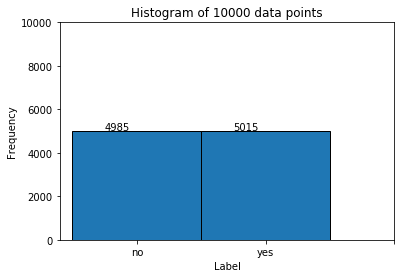

In [9]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "b2_a_i_train.png")

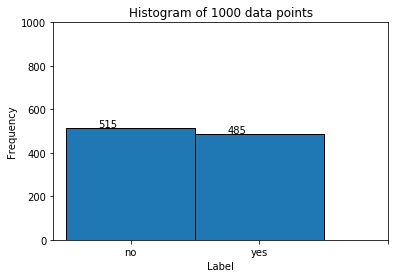

In [10]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "b2_a_i_test.png")

### Saving to CSV

In [11]:
df_train.to_csv("b2_a_i_train.csv", index=False)
df_test.to_csv("b2_a_i_test.csv", index=False)